In [2]:
%reset
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
import scipy.io as sio
import netCDF4 as nc
import glob, os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import matplotlib
matplotlib.rcParams['animation.embed_limit'] =10000000000000000000000000.0
import cmocean

In [5]:
%cd /work/eay/MITgcm_data/Experiment32/
%ls
grid = nc.Dataset('grid.nc')
depth = (grid.variables['Depth'][:])
#depth[0,:]
file0 = nc.Dataset('Temp.nc')
file1 = nc.Dataset('Salt.nc')
file2 = nc.Dataset('U.nc')
file3 = nc.Dataset('V.nc')
file4 = nc.Dataset('Eta.nc')
NX = 600
NY = 1000
NZ = 120

xq = (file1.variables['X'][:])
yq = (file1.variables['Y'][:])
zl = (file1.variables['Z'][:])
Time = file1.variables['T'][:]
print(Time.shape)

xqmat=np.tile(xq,(NY,1))
yqmat=np.tile(yq,(NX,1))
yqmat=np.transpose(yqmat)
print(yqmat.shape)
print(xqmat.shape)

%cd /work/eay/MITgcm_data/

/work0/eay/MITgcm_data/Experiment31
Analysis.ipynb  grid.nc   Temp1.nc  V1.nc           VideoVelocity.gif  W2.nc
data            readme    Temp2.nc  V2.nc           video-xy.ipynb
Eta1.nc         Salt1.nc  U1.nc     Videofresh.gif  video-xz.ipynb
Eta2.nc         Salt2.nc  U2.nc     VideoSalt.gif   W1.nc
(76,)
(1000, 600)
(1000, 600)
/work0/eay/MITgcm_data


In [6]:
mask = file1.variables['S'][30,0,:,:]
mask.shape


(1000, 600)

In [7]:
print(file4)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    MITgcm_version: checkpoint67q
    build_user: Elizabeth.Yankovsky
    build_host: gaea9
    build_date: Fri Apr 23 02:37:42 EDT 2021
    MITgcm_URL: http://mitgcm.org
    MITgcm_tag_id: 
    MITgcm_mnc_ver: 0.9
    sNx: 15
    sNy: 25
    OLx: 3
    OLy: 3
    nSx: 1
    nSy: 1
    nPx: 40
    nPy: 40
    Nx: 600
    Ny: 1000
    Nr: 250
    dimensions(sizes): T(76), Xp1(601), Y(1000), Z(250), X(600), Yp1(1001), Zl(250)
    variables(dimensions): float64 Xp1(Xp1), float64 Y(Y), float64 Z(Z), float64 X(X), float64 Yp1(Yp1), float64 Zl(Zl), float64 T(T), float32 Eta(T,Y,X)
    groups: 



/nbhome/eay/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in greater_equal


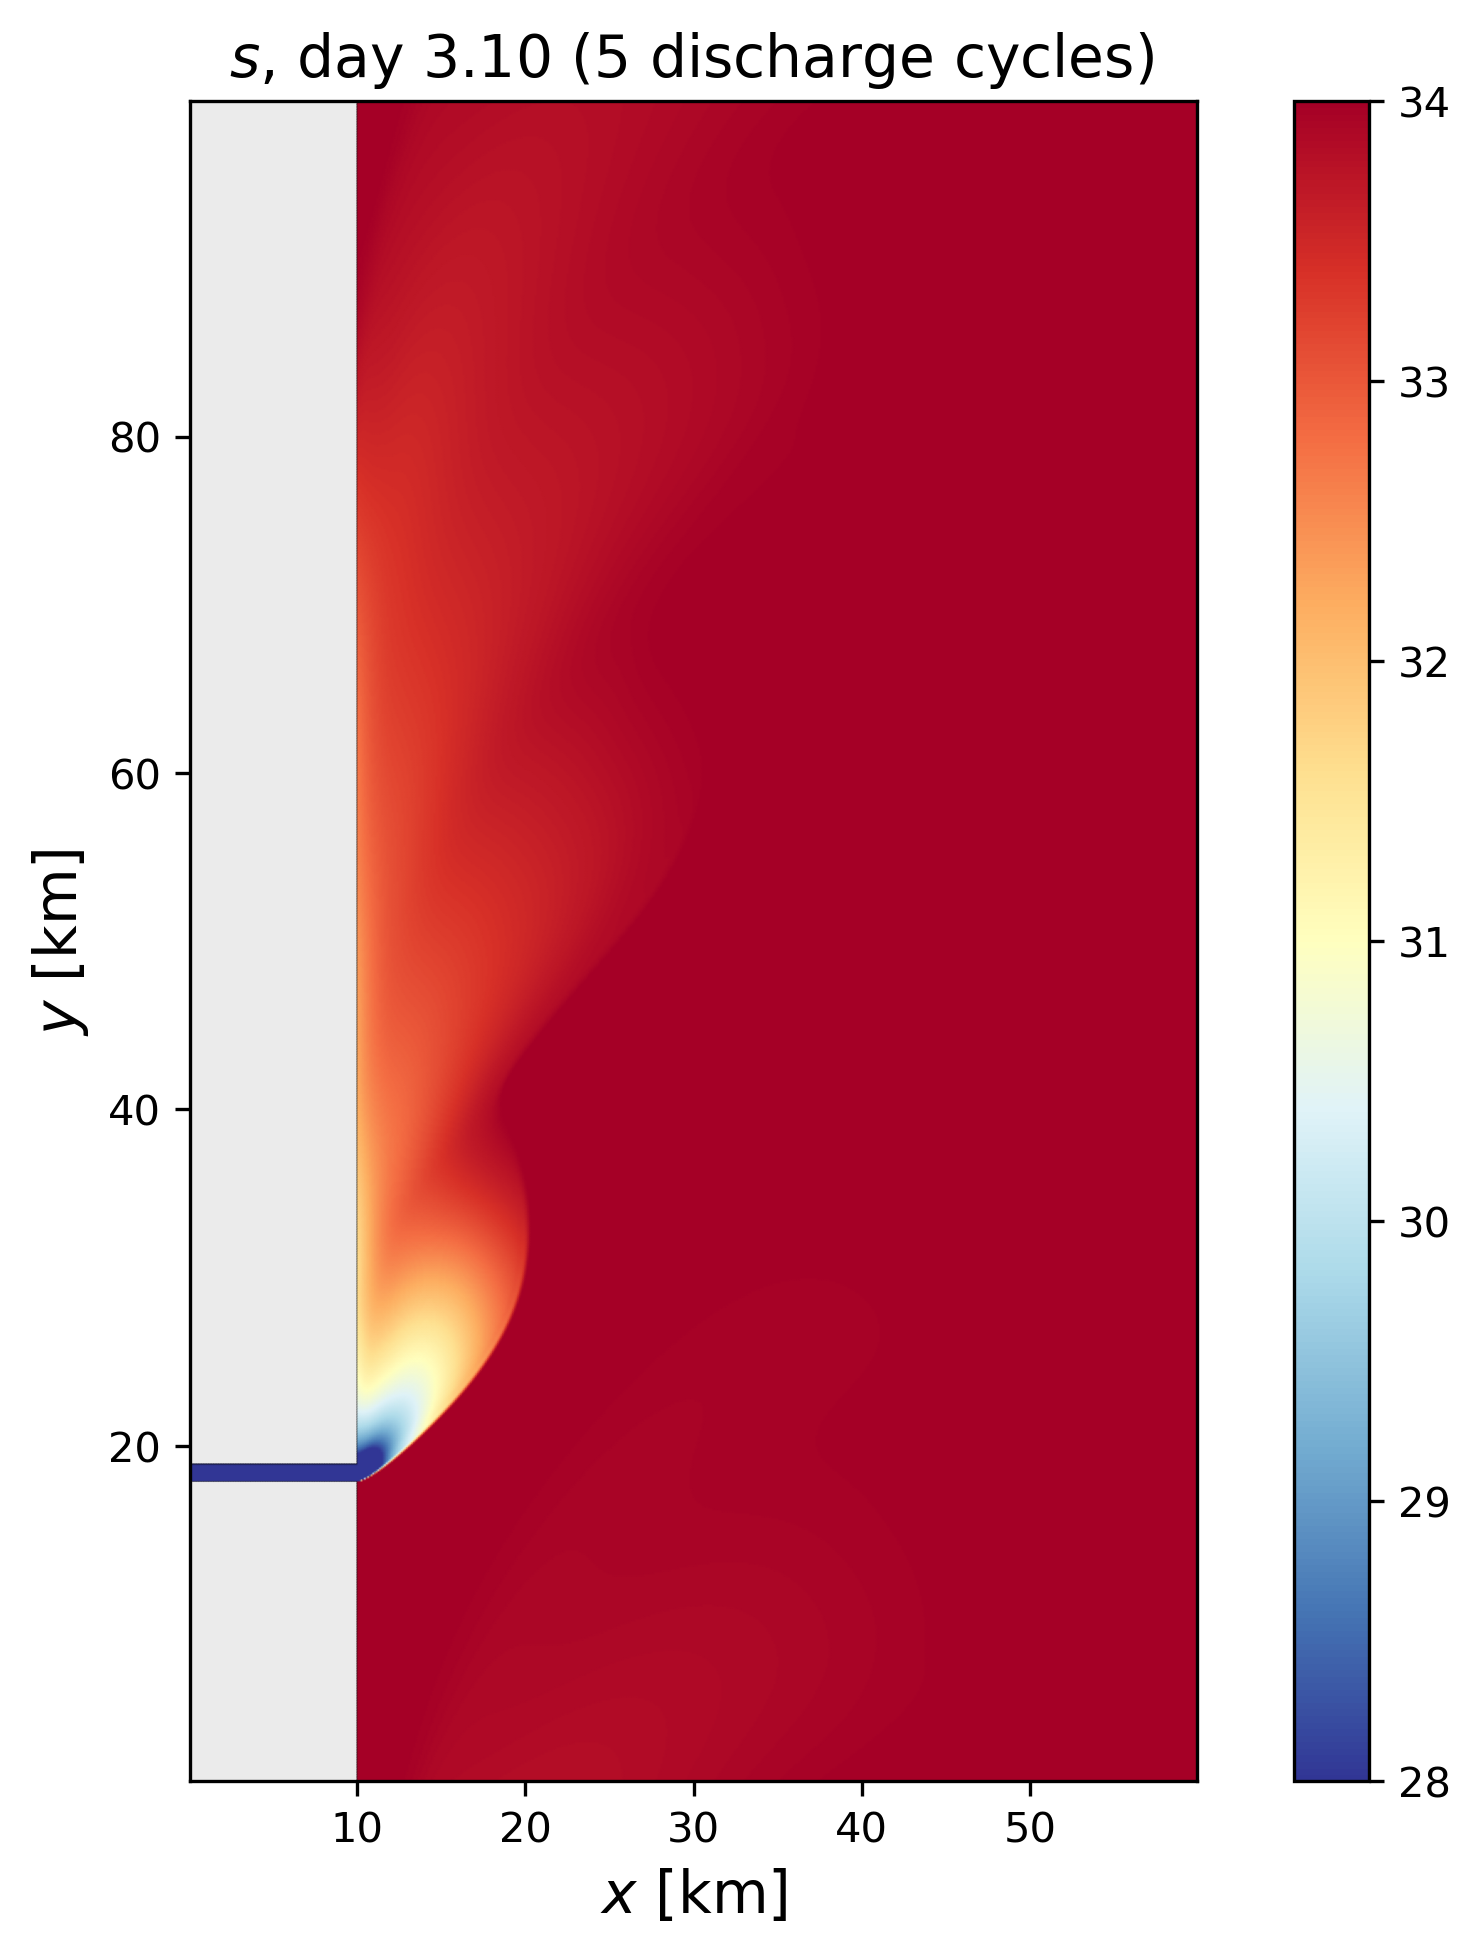

In [9]:
#Plotting surface salinity
index = 149
Salt = file1.variables['S'][index,0,:,:]
Salt[mask==0]=np.nan
Salt[Salt>=34]=34
fig = plt.figure(figsize=(5, 8), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

quad1 = ax1.pcolormesh(xq/1000,yq/1000,Salt,cmap='RdYlBu_r',vmin=12.,vmax=34.,shading='gouraud')
#quad1.cmap.set_over('')
#ax1.set_xlim(0,30)
current_cmap = matplotlib.cm.get_cmap()
current_cmap.set_bad(color='silver')

##depth contours
#CS=ax1.contour(xq/1000, yq/1000, depth, [5.,10.,24.99],colors='w',alpha=0.8)
#manual_locations = [(8, 60), (12, 70), (38, 80)]
#ax1.clabel(CS, fontsize=12,fmt = '%1.0f',manual=manual_locations)
#ax1.plot(40,10,'*',markersize=15,color='w')

ax1.set_title('$s$, day %04.2f (5 discharge cycles) ' %(index/48.), fontsize=14)
ax1.set_aspect('equal')
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$y$ [km]',fontsize=14)

cb1 = fig.colorbar(quad1,ax2)
#plt.title('(psu)', fontsize=14)

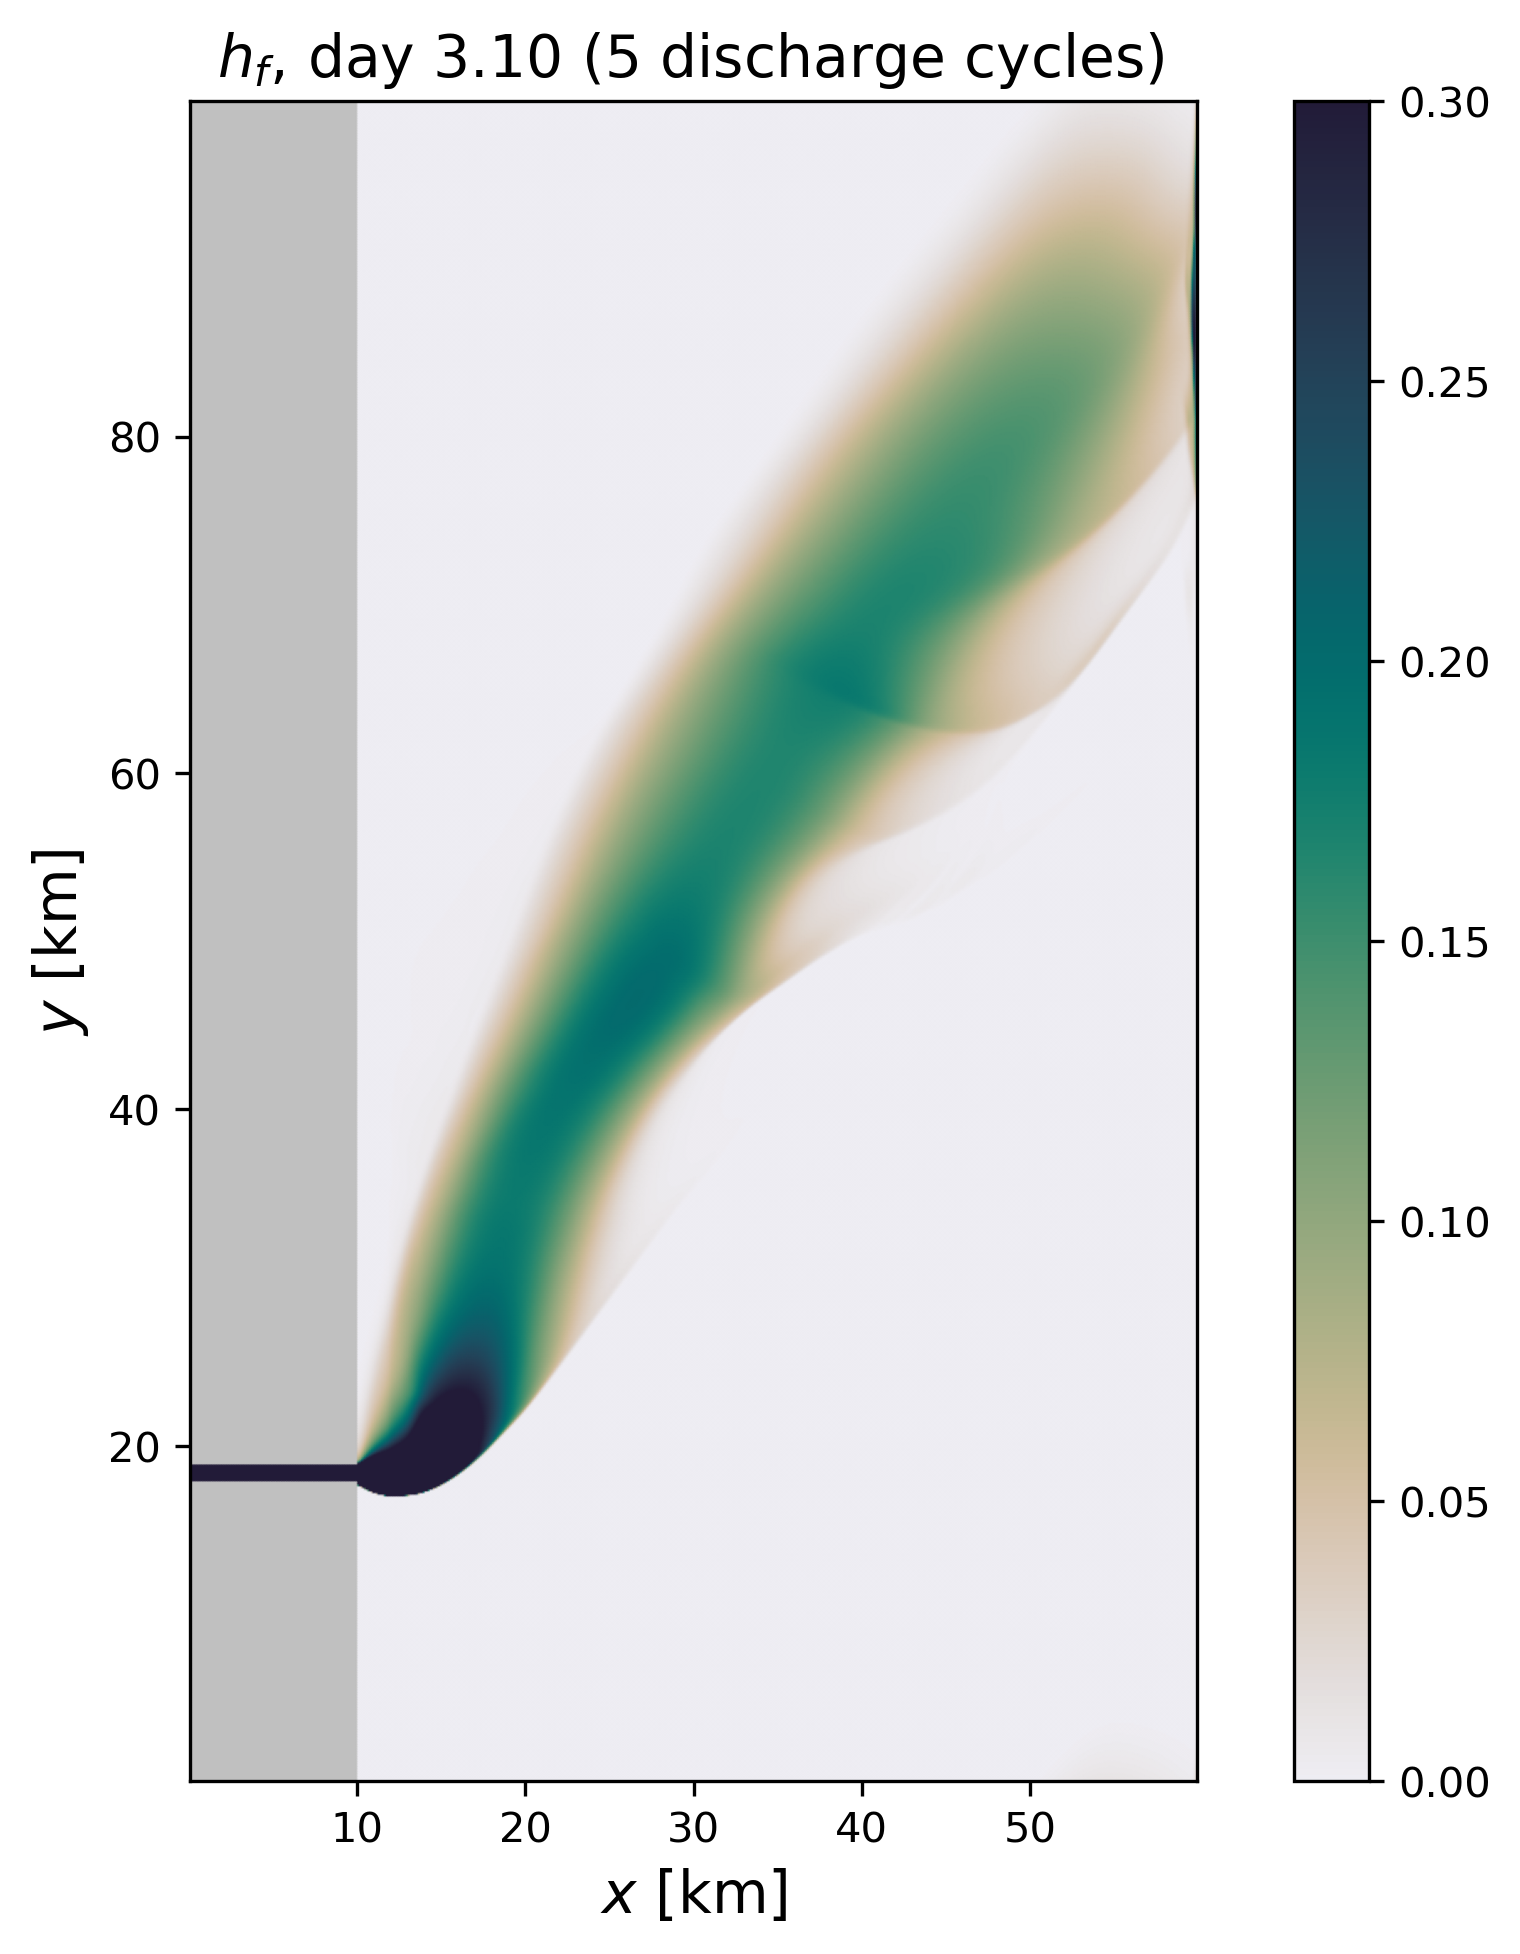

In [45]:
#Plotting freshwater layer
newmask = file1.variables['S'][0,:,:,:]

index=149
Salt = file1.variables['S'][index,:,:,:]; Salt[newmask==0]=np.nan
Sref = Salt*0.0+34.0
hf=0.1*np.nansum((Sref-Salt)/34.0,axis=0)
hf[(mask==0)]=-10000000
###hf(i,j)=0.1*sum((sr-s(i,j,:))/sr); (your delta z is 0.1 correct?)###

fig = plt.figure(figsize=(5, 8), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])


quad1 = ax1.pcolormesh(xq/1000,yq/1000,hf,cmap=cmocean.cm.rain,shading='gouraud',vmin=0,vmax=.3) #cmap=cmocean.cm.deep
quad1.cmap.set_under('silver')
quad1.cmap.set_over(quad1.cmap(1.))

#ax1.set_xlim(0,30)
ax1.set_title('$h_f$, day %04.2f (5 discharge cycles) ' %(index/48.), fontsize=14)
ax1.set_aspect('equal')
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$y$ [km]',fontsize=14)

cb1 = fig.colorbar(quad1,ax2)
#plt.title('(m)', fontsize=14)

In [25]:
hf[(mask==0)]=np.nan
hf_alongshore = np.nansum(hf*100,axis=0)
hf_alongshore.shape
fig = plt.figure(figsize=(5, 5), dpi= 300, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)


ax1.plot(xq/1000,hf_alongshore,color='#B53737')
ax1.set_title('day %04.2f (5 discharge cycles) ' %(index/48.), fontsize=14)
ax1.set_xlabel('$x$ [km]',fontsize=14)
ax1.set_ylabel('$\int\int h_f \;dy\; dz$ [m$^2$]',fontsize=14)
ax1.set_xlim([0,60]);ax1.set_ylim([0,6000])
ax1.text(23, 300, '$(\int\int\int h_f \;dx\;dy\;dz)/T=796.2 $m$^3$', fontsize=10,color='#B53737')
plt.grid()



NameError: name 'hf' is not defined

In [11]:
integral = np.nansum(hf_alongshore*100)
integral/(267840-44640)

798.7223655913979

Text(0.5, 1.0, '(m)')

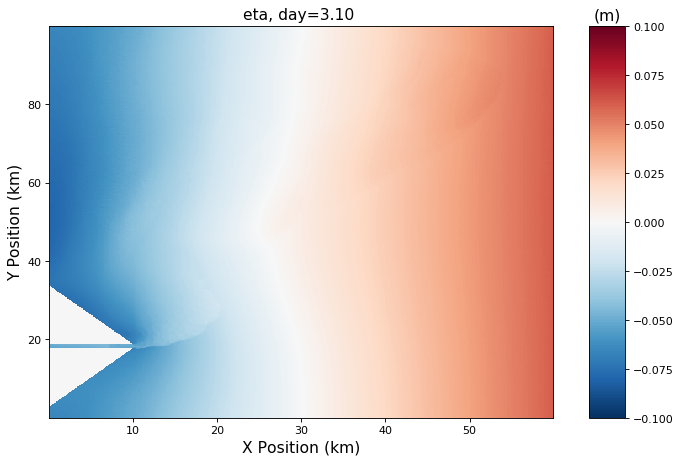

In [12]:
#Plotting eta

index=149
Eta = file4.variables['Eta'][index,:,:]; #Salt[newmask==0]=np.nan



fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])


quad1 = ax1.pcolormesh(xq/1000,yq/1000,Eta,cmap='RdBu_r',vmin=-.1,vmax=.1)
#quad1.cmap.set_under('silver')
#quad1.cmap.set_over(quad1.cmap(1.))

#ax1.set_xlim(0,30)
ax1.set_title('eta, day=%04.2f ' %(index/48.), fontsize=14)
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('X Position (km)',fontsize=14)
ax1.set_ylabel('Y Position (km)',fontsize=14)
cb1 = fig.colorbar(quad1,ax2)
plt.title('(m)', fontsize=14)

Text(0.5, 1.0, '(m/s)')

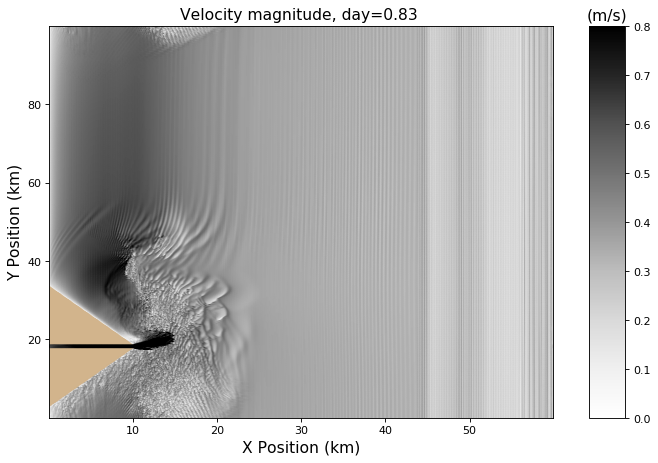

In [13]:
#PLOTTING Offshore Velocity
index=40
U = (file2.variables['U'][index,0,:,1:]+file2.variables['U'][index,0,:,:-1])/2
V = (file3.variables['V'][index,0,1:,:]+file3.variables['V'][index,0,:-1,:])/2
velocity = np.sqrt(U**2+V**2)
velocity[(mask==0)]=-10000000
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])


quad1 = ax1.pcolormesh(xq/1000,yq/1000,velocity,cmap='Greys',vmin=0.,vmax=.8,shading='gouraud')
quad1.cmap.set_under('tan')
#ax1.set_xlim(0,30)
ax1.set_title('Velocity magnitude, day=%04.2f ' %(index/48.), fontsize=14)
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('X Position (km)',fontsize=14)
ax1.set_ylabel('Y Position (km)',fontsize=14)
cb1 = fig.colorbar(quad1,ax2)
plt.title('(m/s)', fontsize=14)

In [14]:
def wright_eos(T,S,p):
  """                                                                                                                                                                                                              
                                                                                                                                                                                                                   
 **********************************************************************                                                                                                                                            
   The subroutines in this file implement the equation of state for   *                                                                                                                                            
   sea water using the formulae given by  Wright, 1997, J. Atmos.     *                                                                                                                                            
   Ocean. Tech., 14, 735-740.  Coded by R. Hallberg, 7/00.            *                                                                                                                                            
 ***********************************************************************                                                                                                                                           
    Converted to Python from F90 by M Harrison 10/11.                                                                                                                                                              
                                                                                                                                                                                                                   
 Calculate seawater equation of state, given T[degC],S[PSU],p[Pa]                                                                                                                                                  
 Returns density [kg m-3]                                                                                                                                                                                          
                                                                                                                                                                                                                   
 ***********************************************************************                                                                                                                                           
                                                                                                                                                                                                                   
 """

  a0 = 7.057924e-4; a1 = 3.480336e-7; a2 = -1.112733e-7;
  b0 = 5.790749e8;  b1 = 3.516535e6;  b2 = -4.002714e4;
  b3 = 2.084372e2;  b4 = 5.944068e5;  b5 = -9.643486e3;
  c0 = 1.704853e5;  c1 = 7.904722e2;  c2 = -7.984422;
  c3 = 5.140652e-2; c4 = -2.302158e2; c5 = -3.079464;

  al0 = a0 + a1*T +a2*S
  p0  = b0 + b4*S + T * (b1 + T*(b2 + b3*T) + b5*S)
  lam = c0 +c4*S + T * (c1 + T*(c2 + c3*T) + c5*S)
  I_denom = 1.0 / (lam + al0*(p+p0))
  rho = (p + p0) * I_denom

  return rho

In [15]:
import sys
import numpy as np

__doc__ = """
Density of Sea Water using McDougall et al. 2003 (JAOT 20) polynomial
"""
# coefficients nonlinear equation of state in pressure coordinates for
eosMDJWFnum =  [ 7.35212840e+00,
                -5.45928211e-02,
                 3.98476704e-04,
                 2.96938239e+00,
                -7.23268813e-03,
                 2.12382341e-03,
                 1.04004591e-02,
                 1.03970529e-07,
                 5.18761880e-06,
                -3.24041825e-08,
                -1.23869360e-11,
                 9.99843699e+02 ]
eosMDJWFden =  [ 7.28606739e-03,
                -4.60835542e-05,
                 3.68390573e-07,
                 1.80809186e-10,
                 2.14691708e-03,
                -9.27062484e-06,
                -1.78343643e-10,
                 4.76534122e-06,
                 1.63410736e-09,
                 5.30848875e-06,
                -3.03175128e-16,
                -1.27934137e-17,
                 1.00000000e+00 ]
def densmdjwf(s,theta,p):
    """
    Computes in-situ density of sea water
    Density of Sea Water using McDougall et al. 2003 (JAOT 20)
    polynomial (Gibbs Potential).

    Parameters
    ----------
    s : array_like
        salinity [psu (PSS-78)]
    theta : array_like
        potential temperature [degree C (IPTS-68)];
        same shape as s
    p : array_like
        pressure [dbar]; broadcastable to shape of s

    Returns
    -------
    dens : array
        density [kg/m^3]

    Example
    -------
    >>> densmdjwf(35., 25., 2000.)
    1031.654229

    Notes
    -----
    AUTHOR:  Martin Losch 2002-08-09  (Martin.Losch@awi.de)

    McDougall et al., 2003, JAOT 20(5), pp. 730-741
    """
    
    # make sure arguments are floating point
    s = np.asfarray(s)
    t = np.asfarray(theta)
    p = np.asfarray(p)

    p1 = np.copy(p);
    
    t1 = np.copy(t);
    t2 = t*t;
    
    s1 = np.copy(s);
    if np.any(s1<0):
        sys.stderr.write('negative salinity values! setting to nan\n')
        # # the sqrt will take care of this
        # if s.ndim > 0:
        #     s[s<0] = np.nan
        # else:
        #     s = np.nan
    sp5 = np.sqrt(s1)
    p1t1=p1*t1
    num = ( eosMDJWFnum[11] 
            + t1*(eosMDJWFnum[0]
                  + t1*(eosMDJWFnum[1] + eosMDJWFnum[2]*t1) )
            + s1*(eosMDJWFnum[3]
                  + eosMDJWFnum[4]*t1  + eosMDJWFnum[5]*s1)
            + p1*(eosMDJWFnum[6] + eosMDJWFnum[7]*t2
                  + eosMDJWFnum[8]*s1
                  + p1*(eosMDJWFnum[9] + eosMDJWFnum[10]*t2) )
    )
    den = ( eosMDJWFden[12]
            + t1*(eosMDJWFden[0]
                  + t1*(eosMDJWFden[1]
                        + t1*(eosMDJWFden[2] + t1*eosMDJWFden[3] ) ) )
            + s1*(eosMDJWFden[4]
                  + t1*(eosMDJWFden[5]
                        + eosMDJWFden[6]*t2)
                  + sp5*(eosMDJWFden[7] + eosMDJWFden[8]*t2) )
            + p1*(eosMDJWFden[9]
                  + p1t1*(eosMDJWFden[10]*t2 + eosMDJWFden[11]*p1) )
    )
    epsln = 0
    denom = 1.0/(epsln+den)
    rho = num*denom;

    return rho
# aliases
dens = densmdjwf

In [16]:
print(densmdjwf(34., 15., 0.),'MDJWF @ 34psu, 15C')
print(wright_eos(15., 34., 0.),'Wright @ 34psu, 15C')

1025.2031586387247 MDJWF @ 34psu, 15C
1025.2022031329202 Wright @ 34psu, 15C


In [17]:
#Plotting inverse Froude number
index=149

mask3D = file1.variables['S'][0,:,:,:]
Temp = file0.variables['Temp'][index,:,:,:]; Temp[mask3D==0]=np.nan
Salt = file1.variables['S'][index,:,:,:]; Salt[mask3D==0]=np.nan
Sref = Salt*0.0+34.0
hf=0.1*np.nansum((Sref-Salt)/34.0,axis=0)
hf[(mask==0)]=np.nan

drho= densmdjwf(34.,15.,0)-densmdjwf(0.,15.,0);
rho_o=densmdjwf(34.,15.,0);
C_int=np.sqrt(9.81*drho*hf/rho_o)
#drho= wright_eos(15.,34.,0)-wright_eos(15.,0.,0);
#rho_o=wright_eos(15.,34.,0);

U = (file2.variables['U'][index,0,:,1:]+file2.variables['U'][index,0,:,:-1])/2
V = (file3.variables['V'][index,0,1:,:]+file3.variables['V'][index,0,:-1,:])/2
velocity = np.sqrt(U**2+V**2) 
velocity[(mask==0)]=np.nan

Inv_Fr=C_int/velocity

In [18]:
Inv_Fr.shape

(1000, 600)

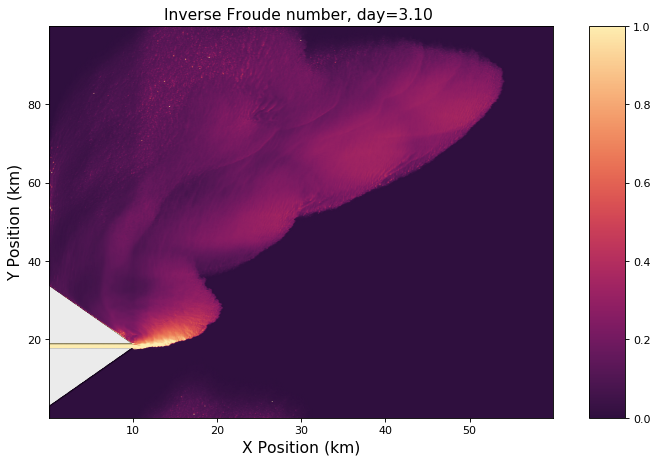

In [19]:
fig = plt.figure(figsize=(9, 7), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.1,0.7,0.7])  #left pos. bottom pos. width, height #ax1 = fig.add_subplot(111)
ax2 = fig.add_axes([.9, 0.1, 0.05, 0.7])

 
quad1 = ax1.pcolormesh(xq/1000,yq/1000,Inv_Fr,cmap=cmocean.cm.matter_r,shading='gouraud',vmin=0,vmax=1.)
quad1.cmap.set_under('silver')
#ax1.set_xlim(0,30)
ax1.set_title('Inverse Froude number, day=%04.2f ' %(149/48.), fontsize=14)
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_xlabel('X Position (km)',fontsize=14)
ax1.set_ylabel('Y Position (km)',fontsize=14)
cb1 = fig.colorbar(quad1,ax2)

In [20]:
np.nanmin(Inv_Fr)

0.0

In [40]:
test1=((9.81*drho*hf/rho_o)**.5)
test2=velocity
test3=test1/test2

In [41]:
print(test1[500,50])
print(test2[500,50])
print(test3[500,50])
print(Inv_Fr[500,50])

0.043704294
0.9061406
0.048231248
0.048231248


In [63]:
drho

26.100819429190665

In [64]:
rho_o

1025.2031586387247